![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# Ejercicio opcional de Preprocesamiento 

Recibimos un dataset con información sobre la cancelación de servicios y atributos de clientes que han contratado el servicio de una empresa de telecomunicaciones. En este ejercicio deberás analizar y preparar dicho dataset para entrenar un modelo de Machine Learning que sirva para predecir la tasa de cancelación.

Cada fila del dataset representa un cliente, y cada columna es una atributo de dicho cliente. El dataset contiene la siguiente información:

- **State**: Estado donde vive el cliente.
- **Account length**: Hace cuánto tiempo el cliente contrato el servicio (en días).
- **Area code**: Código de área 
- **International plan**: ¿El cliente ha contratado un plan internacional?
- **Voice mail plan**: ¿El cliente ha contratado un plan de buzón de voz? 
- **Number vmail messages**: Número de mensajes de voz que ha recibido 
- **Total day minutes**: Minutos gastados en llamadas nacionales
- **Total day calls**: Número de llamadas nacionales realizadas 
- **Total day charge**: Cargos nacionales
- **Total intl minutes**: Minutos gastados en llamadas internacionales
- **Total intl calls**: Número de llamadas internacionales 
- **Total intl charge**: Cargos internacionales 
- **Customer service calls**: Llamadas al servicio de cliente 
- **Client type**: Tipo de cliente (frequent caller, moderate caller, infrequent caller)
- **Churn**: ¿El usuario canceló el servicio?

## Importar librerias

In [1]:
import pandas as pd 
import numpy as np 

## Leer datos y realizar revisiones generales

In [2]:
df=pd.read_csv('data/churn_telco.csv')

In [3]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Client type,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,8.7,4,2.35,1,moderate_caller,False
1,IN,65,415,No,No,0,129.1,137,21.95,12.7,6,3.43,4,frequent_caller,True
2,NY,161,415,No,No,0,332.9,67,56.59,5.4,9,1.46,4,infrequent_caller,True
3,SC,111,415,No,No,0,110.4,103,18.77,7.7,6,2.08,2,moderate_caller,False
4,HI,49,510,No,No,0,119.3,117,20.28,11.1,1,3.00,1,frequent_caller,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,11.5,7,3.11,2,infrequent_caller,False
663,AL,106,408,No,Yes,29,NaN,131,NaN,8.1,3,2.19,1,frequent_caller,False
664,VT,60,415,No,No,0,193.9,118,32.96,13.2,8,3.56,3,frequent_caller,False
665,WV,159,415,No,No,0,169.8,114,28.87,11.6,4,3.13,1,frequent_caller,False


In [4]:
df.columns=df.columns.str.lower().str.replace(' ','_')

## ¿Hay variables con valores sin sentido? Si fuese así, corrígelos 

In [5]:
df.describe(include='all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn
count,667,667.000000,667.000000,667,667,667.000000,657.000000,667.000000,657.000000,667.000000,667.000000,667.000000,667.000000,667,667
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,AZ,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,infrequent_caller,False
freq,19,NaN,NaN,614,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227,572
mean,NaN,102.841079,436.157421,NaN,NaN,8.407796,181.028463,100.937031,30.775419,10.238381,4.379310,2.764948,1.563718,NaN,NaN
std,NaN,40.819480,41.783305,NaN,NaN,13.994480,55.000102,20.396790,9.350029,2.807850,2.627824,0.758167,1.333357,NaN,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,25.900000,30.000000,4.400000,0.000000,-1.000000,0.000000,0.000000,NaN,NaN
25%,NaN,76.000000,408.000000,NaN,NaN,0.000000,146.400000,87.500000,24.890000,8.600000,3.000000,2.320000,1.000000,NaN,NaN
50%,NaN,102.000000,415.000000,NaN,NaN,0.000000,178.400000,101.000000,30.330000,10.500000,4.000000,2.840000,1.000000,NaN,NaN
75%,NaN,128.000000,415.000000,NaN,NaN,20.000000,220.700000,115.000000,37.520000,12.050000,6.000000,3.255000,2.000000,NaN,NaN


In [6]:
df.total_day_minutes.value_counts(dropna=False)

NaN      10
153.5     4
189.8     4
137.8     3
183.6     3
         ..
215.6     1
322.3     1
25.9      1
205.3     1
213.8     1
Name: total_day_minutes, Length: 555, dtype: int64

In [7]:
df.total_day_charge.value_counts(dropna=False)

NaN      10
26.10     4
32.27     4
23.43     3
31.21     3
         ..
36.65     1
54.79     1
4.40      1
34.90     1
36.35     1
Name: total_day_charge, Length: 555, dtype: int64

In [8]:
df[df.total_day_minutes.isnull()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn
34,AZ,93,415,No,No,0,NaN,71,NaN,10.9,-1,2.94,2,infrequent_caller,False
45,MI,86,510,No,Yes,41,NaN,101,NaN,9.5,3,2.57,0,moderate_caller,False
231,AL,72,415,No,No,0,NaN,93,NaN,10.4,5,2.81,4,moderate_caller,False
241,PA,122,415,No,No,0,NaN,62,NaN,12.7,2,3.43,1,infrequent_caller,False
471,OH,135,415,No,No,0,NaN,107,NaN,13.7,6,3.70,1,moderate_caller,False
515,NC,76,510,No,No,0,NaN,94,NaN,10.0,4,2.70,1,moderate_caller,False
552,SC,112,415,No,No,0,NaN,97,NaN,14.2,2,3.83,2,moderate_caller,True
561,WY,134,510,No,No,0,NaN,93,NaN,12.3,10,3.32,0,moderate_caller,True
654,NY,120,510,No,Yes,27,NaN,115,NaN,0.0,0,0.00,1,frequent_caller,False
663,AL,106,408,No,Yes,29,NaN,131,NaN,8.1,3,2.19,1,frequent_caller,False


In [9]:
df[(df.voice_mail_plan=='No') & (df.number_vmail_messages==0)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn
0,LA,117,408,No,No,0,184.5,97,31.37,8.7,4,2.35,1,moderate_caller,False
1,IN,65,415,No,No,0,129.1,137,21.95,12.7,6,3.43,4,frequent_caller,True
2,NY,161,415,No,No,0,332.9,67,56.59,5.4,9,1.46,4,infrequent_caller,True
3,SC,111,415,No,No,0,110.4,103,18.77,7.7,6,2.08,2,moderate_caller,False
4,HI,49,510,No,No,0,119.3,117,20.28,11.1,1,3.00,1,frequent_caller,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,IN,114,408,No,No,0,203.8,85,34.65,11.7,-1,3.16,1,infrequent_caller,False
661,CA,84,415,No,No,0,280.0,113,47.60,10.4,4,2.81,0,frequent_caller,True
664,VT,60,415,No,No,0,193.9,118,32.96,13.2,8,3.56,3,frequent_caller,False
665,WV,159,415,No,No,0,169.8,114,28.87,11.6,4,3.13,1,frequent_caller,False


In [10]:
df[df.international_plan=='No']

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn
0,LA,117,408,No,No,0,184.5,97,31.37,8.7,4,2.35,1,moderate_caller,False
1,IN,65,415,No,No,0,129.1,137,21.95,12.7,6,3.43,4,frequent_caller,True
2,NY,161,415,No,No,0,332.9,67,56.59,5.4,9,1.46,4,infrequent_caller,True
3,SC,111,415,No,No,0,110.4,103,18.77,7.7,6,2.08,2,moderate_caller,False
4,HI,49,510,No,No,0,119.3,117,20.28,11.1,1,3.00,1,frequent_caller,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,CA,84,415,No,No,0,280.0,113,47.60,10.4,4,2.81,0,frequent_caller,True
662,WI,114,415,No,Yes,26,137.1,88,23.31,11.5,7,3.11,2,infrequent_caller,False
663,AL,106,408,No,Yes,29,NaN,131,NaN,8.1,3,2.19,1,frequent_caller,False
664,VT,60,415,No,No,0,193.9,118,32.96,13.2,8,3.56,3,frequent_caller,False


In [11]:
df[df.total_intl_calls<0]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn
34,AZ,93,415,No,No,0,NaN,71,NaN,10.9,-1,2.94,2,infrequent_caller,False
96,AL,55,415,Yes,No,0,191.9,91,32.62,14.3,-1,3.86,1,infrequent_caller,True
106,RI,150,415,No,Yes,29,209.9,77,35.68,6.6,-1,1.78,0,infrequent_caller,False
119,NM,30,415,No,No,0,169.9,144,28.88,11.4,-1,3.08,1,frequent_caller,False
150,AR,156,415,No,No,0,178.8,94,30.40,7.5,-1,2.03,1,moderate_caller,False
158,ME,151,415,No,Yes,26,196.5,98,33.41,13.4,-1,3.62,0,moderate_caller,False
181,WY,104,408,No,No,0,183.6,133,31.21,12.7,-1,3.43,1,frequent_caller,False
206,MS,116,415,No,No,0,217.3,91,36.94,11.3,-1,3.05,2,infrequent_caller,False
216,VT,119,510,No,No,0,190.4,74,32.37,10.0,-1,2.70,2,infrequent_caller,False
225,NY,108,415,No,No,0,154.2,123,26.21,15.4,-1,4.16,4,frequent_caller,True


In [12]:
df.loc[df.total_intl_calls<0,'total_intl_calls']=np.nan
df.loc[df.total_intl_calls.isnull(),'total_intl_calls']=df.total_intl_calls.median()

## ¿Hay variables con valores vacíos? Si fuese así, rellénalos

In [13]:
df.loc[df.total_day_minutes.isnull() ,'total_day_minutes']=np.round(df.total_day_minutes.mean(),1)
df.loc[df.total_day_charge.isnull(),'total_day_charge']=np.round(df.total_day_charge.mean(),2)

In [14]:
df.describe(include='all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn
count,667,667.000000,667.000000,667,667,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667,667
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2
top,AZ,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,infrequent_caller,False
freq,19,NaN,NaN,614,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227,572
mean,NaN,102.841079,436.157421,NaN,NaN,8.407796,181.028036,100.937031,30.775487,10.238381,4.529235,2.764948,1.563718,NaN,NaN
std,NaN,40.819480,41.783305,NaN,NaN,13.994480,54.585627,20.396790,9.279568,2.807850,2.453220,0.758167,1.333357,NaN,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,25.900000,30.000000,4.400000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,76.000000,408.000000,NaN,NaN,0.000000,146.700000,87.500000,24.940000,8.600000,3.000000,2.320000,1.000000,NaN,NaN
50%,NaN,102.000000,415.000000,NaN,NaN,0.000000,179.200000,101.000000,30.460000,10.500000,4.000000,2.840000,1.000000,NaN,NaN
75%,NaN,128.000000,415.000000,NaN,NaN,20.000000,219.350000,115.000000,37.290000,12.050000,6.000000,3.255000,2.000000,NaN,NaN


## ¿Qué porcentaje de los clientes en el dataset han cancelado el servicio?

In [15]:
df.churn.value_counts(normalize=True)

False    0.857571
True     0.142429
Name: churn, dtype: float64

## ¿Qué variables están más correladas con `Churn`?

In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['y']=le.fit_transform(df.churn)
df['international_plan_enc']=le.fit_transform(df.international_plan)
df['voice_mail_plan_enc']=le.fit_transform(df.voice_mail_plan)
df['client_type_enc']=le.fit_transform(df.client_type)
df['state_enc']=le.fit_transform(df.state)

In [17]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,client_type,churn,y,international_plan_enc,voice_mail_plan_enc,client_type_enc,state_enc
0,LA,117,408,No,No,0,184.5,97,31.37,8.7,4.0,2.35,1,moderate_caller,False,0,0,0,2,18
1,IN,65,415,No,No,0,129.1,137,21.95,12.7,6.0,3.43,4,frequent_caller,True,1,0,0,0,15
2,NY,161,415,No,No,0,332.9,67,56.59,5.4,9.0,1.46,4,infrequent_caller,True,1,0,0,1,34
3,SC,111,415,No,No,0,110.4,103,18.77,7.7,6.0,2.08,2,moderate_caller,False,0,0,0,2,40
4,HI,49,510,No,No,0,119.3,117,20.28,11.1,1.0,3.00,1,frequent_caller,False,0,0,0,0,11


In [18]:
df.corr().style.background_gradient(cmap='coolwarm')

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,y,international_plan_enc,voice_mail_plan_enc,client_type_enc,state_enc
account_length,1.000000,-0.026327,-0.011993,0.018443,0.035703,0.018450,0.002362,0.041805,0.002456,-0.027677,0.012315,0.012315,0.029549,0.003918,0.005006,0.047144
area_code,-0.026327,1.000000,-0.006907,0.052112,-0.008972,0.052102,-0.037980,-0.014364,-0.038044,0.000103,0.027129,0.027129,0.053461,-0.032253,0.004352,0.021339
number_vmail_messages,-0.011993,-0.006907,1.000000,-0.057888,-0.009952,-0.057901,0.029949,-0.043252,0.029999,0.007859,-0.102381,-0.102381,0.023145,0.956168,0.003686,-0.091541
total_day_minutes,0.018443,0.052112,-0.057888,1.000000,-0.029911,1.000000,-0.017120,0.013739,-0.017188,0.024359,0.230559,0.230559,0.051345,-0.049620,0.010196,-0.017000
total_day_calls,0.035703,-0.008972,-0.009952,-0.029911,1.000000,-0.029927,-0.015319,-0.006175,-0.015201,-0.045953,0.019360,0.019360,0.040889,-0.025318,-0.439273,-0.032697
total_day_charge,0.018450,0.052102,-0.057901,1.000000,-0.029927,1.000000,-0.017113,0.013723,-0.017181,0.024355,0.230558,0.230558,0.051329,-0.049632,0.010225,-0.017001
total_intl_minutes,0.002362,-0.037980,0.029949,-0.017120,-0.015319,-0.017113,1.000000,0.013286,0.999993,-0.036268,-0.003740,-0.003740,0.013960,0.048435,0.019751,0.005987
total_intl_calls,0.041805,-0.014364,-0.043252,0.013739,-0.006175,0.013723,0.013286,1.000000,0.013420,0.001381,0.011764,0.011764,0.031547,-0.028536,-0.031852,0.027591
total_intl_charge,0.002456,-0.038044,0.029999,-0.017188,-0.015201,-0.017181,0.999993,0.013420,1.000000,-0.036167,-0.003681,-0.003681,0.014033,0.048504,0.019716,0.006014
customer_service_calls,-0.027677,0.000103,0.007859,0.024359,-0.045953,0.024355,-0.036268,0.001381,-0.036167,1.000000,0.233259,0.233259,0.025475,-0.001355,-0.002269,-0.001053


In [19]:
df.corr()['y'].sort_values(ascending=False)

churn                     1.000000
y                         1.000000
customer_service_calls    0.233259
total_day_minutes         0.230559
total_day_charge          0.230558
international_plan_enc    0.181634
state_enc                 0.038488
area_code                 0.027129
total_day_calls           0.019360
account_length            0.012315
total_intl_calls          0.011764
total_intl_charge        -0.003681
total_intl_minutes       -0.003740
client_type_enc          -0.049785
number_vmail_messages    -0.102381
voice_mail_plan_enc      -0.113465
Name: y, dtype: float64

## Haz un boxplot en el que muestres la distribución de `Total day minutes` de acuerdo a si un cliente ha cancelado el servicio o no 

<AxesSubplot:title={'center':'total_day_minutes'}, xlabel='[churn]'>

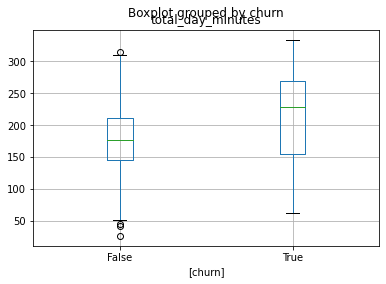

In [20]:
df[['total_day_minutes','churn']].boxplot(by='churn')

## Divide el dataset en train y test, haciendo un split 90/10

In [21]:
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,test_size=0.1,random_state=42,stratify=df.y)

## Crea una columna nueva en los dataset de train y test donde apliques `OrdinalEncoder` a la columna `State` (ignorar `SettingWithCopyWarning`)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

In [23]:
df_train['state_enc_oe']=oe.fit_transform(df_train[['state']])

C:\Users\carlo\AppData\Local\Temp/ipykernel_24264/3079816236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['state_enc_oe']=oe.fit_transform(df_train[['state']])


In [24]:
df_test['state_enc_oe']=oe.transform(df_test[['state']])

C:\Users\carlo\AppData\Local\Temp/ipykernel_24264/4024327322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['state_enc_oe']=oe.transform(df_test[['state']])


In [27]:
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_intl_minutes,...,total_intl_charge,customer_service_calls,client_type,churn,y,international_plan_enc,voice_mail_plan_enc,client_type_enc,state_enc,state_enc_oe
368,WY,62,415,No,No,0,172.4,132,29.31,11.0,...,2.97,0,frequent_caller,False,0,0,0,0,50,50.0
48,SC,78,510,No,No,0,168.3,110,28.61,12.5,...,3.38,1,moderate_caller,False,0,0,0,2,40,40.0
32,OR,65,415,No,No,0,116.8,87,19.86,14.1,...,3.81,1,infrequent_caller,False,0,0,0,1,37,37.0
24,WA,127,408,No,No,0,146.7,91,24.94,13.7,...,3.70,1,infrequent_caller,False,0,0,0,1,47,47.0
471,OH,135,415,No,No,0,181.0,107,30.78,13.7,...,3.70,1,moderate_caller,False,0,0,0,2,35,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,IA,63,510,No,No,0,153.5,81,26.10,6.5,...,1.76,2,infrequent_caller,False,0,0,0,1,12,12.0
42,WY,215,510,No,No,0,83.6,148,14.21,10.7,...,2.89,0,frequent_caller,False,0,0,0,0,50,50.0
309,NH,121,510,No,Yes,35,193.8,62,32.95,5.9,...,1.59,0,infrequent_caller,False,0,0,1,1,30,30.0
500,KY,58,415,No,No,0,247.2,116,42.02,9.3,...,2.51,2,frequent_caller,True,1,0,0,0,17,17.0


## Aplicar `OneHotEncoder` a la columna `Client type` (no hace falta guardar el resultado como columnas en el dataset)

In [25]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()

In [26]:
ohe.fit_transform(df_train[['client_type']]).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [28]:
ohe.transform(df_test[['client_type']]).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0